# Ford GoBike System Data Exploration
## by Ping-Lun Yeh

## Investigation Overview

In this investigation, I would like to look at the information of bike users that could be a great potential business opportunities for both bike and Caltrain company. The main focus was on users background information: user_type, member_birth_year, member_gender, and bike_share_for_all_trip, but I also explored interesting discoverys from the duration time and bike station locations.   


## Dataset Overview

The data consisted of bike station and user information of approximately 192,000 user records. The attributes included the bike station information such as duration time, start and end time, start and end station name, start and end station latitude and longitude, user type, member birth year, member gender, and bike share or not for all trip. In addition, 9,960 data points were removed from the analysis due to inconsistencies or missing information.  



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('201901-fordgobike-tripdata-1.csv')

In [3]:
# separate the dataset and analyze user information at first

df.dropna(inplace=True)
cust = df[['bike_id','user_type','member_birth_year','member_gender','bike_share_for_all_trip']]

## Bike User Background 

The information of bike users are the most important and useful resources for bike company. That is to say, a better and deeper understanding for bike users will definitely create more business opportunities. Therefore, plotting **bar chart** is a convenient and appropriate way to get some ideas. 


##  User Type vs. Gender vs. Share Bike or Not

For better understanding, I combined all attributes together and plotted them as a bar chart. By doing so, it is obvious that most bike users are male subscribers who do not want to share their bikes during the trip. Although female subscribers who do not want to share bikes for all the trip is the second place, the gap between them is still really huge that bike company should pay more attentions on the male subscribers.  


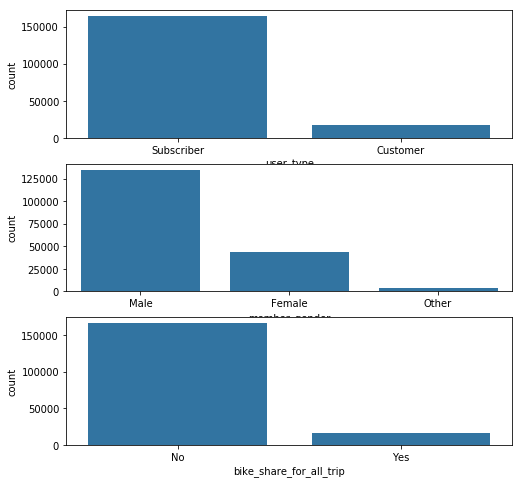

In [4]:
# Plot all three variables together to get an idea of the distribution

fig, ax = plt.subplots(nrows=3, figsize=[8,8]) 

base_color = sb.color_palette()[0]
sb.countplot(data = cust, x = 'user_type', color = base_color, ax = ax[0])
sb.countplot(data = cust, x = 'member_gender', color = base_color, ax = ax[1])
sb.countplot(data = cust, x = 'bike_share_for_all_trip', color = base_color, ax = ax[2])
plt.show();

## Distribution of Member Ages

In order to uncover the specific user group, an age distribution histogram would be a perfect way to realize the insights. The mean birth year is around 1984 (35 years old) which means most bike users are adults who usually need to work daily.  

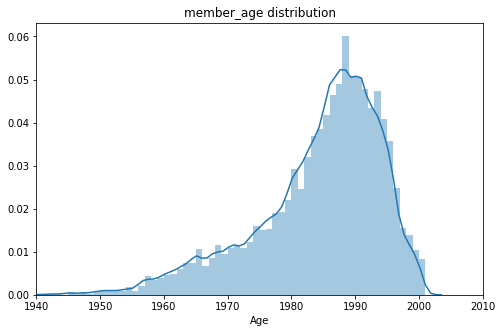

In [6]:
# Looking deeper for "member_birth_year"

plt.figure(figsize=[8,5])

bin_size = np.arange(1940, cust['member_birth_year'].max()+1, 1) 
sb.distplot(cust['member_birth_year'], bins = bin_size, hist_kws = {'alpha':0.4})
plt.title('member_age distribution')
plt.xlabel('Age')
plt.xlim(1940,2010);

## Member Background with Ages 

As shown, I classified and plotted user information in a boxplot by using user type, member gender, and member birth year. Basically, this analysis can be separated into two parts. For subscribers part, there are more males than females. Although their average birth year is around 1983, there are still many outliers which means the standard deviation is large. In addition, the minimum and maximum birth year are 1900 and 2001 in this case. In other words, there is no certain type of the users, but users born in 1983 still have the highest portion above all. At the same time, there are more males in customers part and their average birth year is around 1985. Meanwhile, their minimum and maximum birth year are 1900 and 2000 in this dataset and there are still many outliers which means users do not born from certain birth year, but from different years.

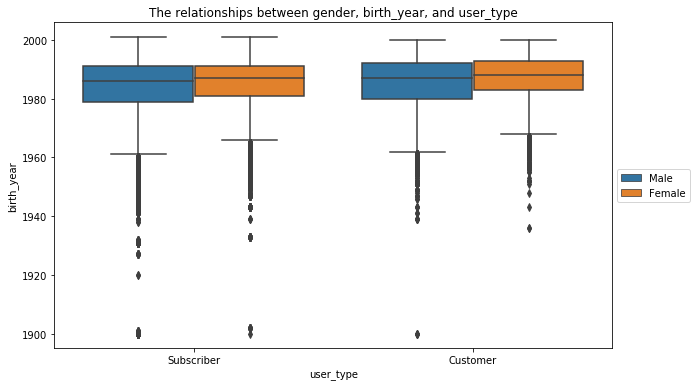

In [7]:
# Boxplot

plt.figure(figsize=[10,6])

cust_sub = cust.loc[cust['member_gender'].isin(['Male','Female'])]
sb.boxplot(data=cust_sub, y='member_birth_year',x='user_type',hue='member_gender')
plt.title('The relationships between gender, birth_year, and user_type')
plt.xlabel('user_type')
plt.ylabel('birth_year')
plt.legend(loc=6, bbox_to_anchor = (1.0, 0.5));

## Interesting Discovery on Birth Year

During the data exploration, I found out that the earliest birth year is 1900 and surprisingly there are at least one male and female here. The reason why is because their start and end station names are similar which means it is probably a routine schedule for them.

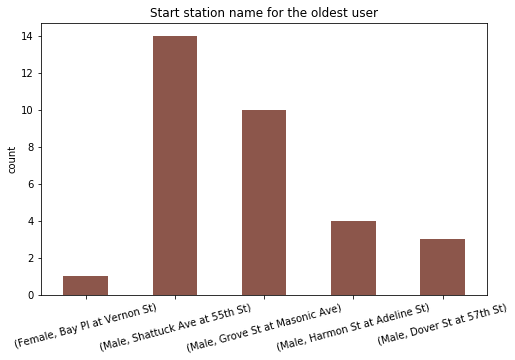

In [8]:
# Further research for users who born in 1900 (start_stat_name)

old = df[df['member_birth_year'] == 1900]

base_color = sb.color_palette()[5]
old.groupby('member_gender')['start_station_name'].value_counts()[0:5].\
                plot(kind = 'bar', color = base_color, figsize=(8,5))
plt.title('Start station name for the oldest user')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=15);

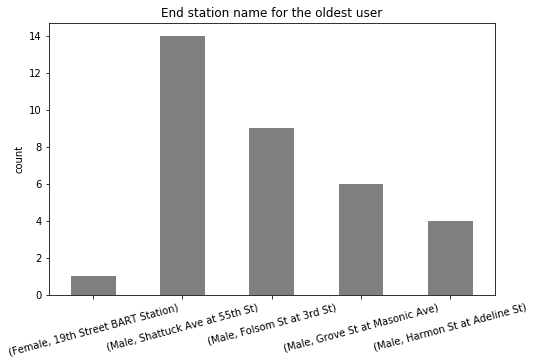

In [9]:
# Further research for users who born in 1900 (end_stat_name)

old = df[df['member_birth_year'] == 1900]

base_color = sb.color_palette()[7]
old.groupby('member_gender')['end_station_name'].value_counts()[0:5].\
                plot(kind = 'bar', color = base_color, figsize=(8,5))
plt.title('End station name for the oldest user')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=15);

## Distribution of Start Time

From the data in the start time, we can tell the distribution of rush hours for bike users. The rush hours are between 8 to 9 am in the morning and 5 to 6 pm in the afternoon which means most bike users need to work or they just finish their work and ready to go home.

In [10]:
# Divide the start_time into "AM" and "PM"

AM_PM = []
AM = []
PM = []

for i in df['start_time']:
    hour = i.split(':')[0].split(' ')[1]
    AM_PM.append(hour)
    
for m, n in enumerate(AM_PM):
    if int(n) <= 12: 
        AM.append(n)
    else:
        PM.append(n)

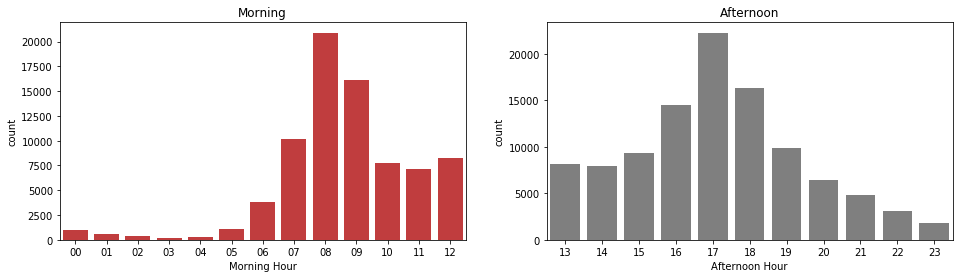

In [11]:
# Comparison between Morning:'AM' and Afternoon:'PM'

plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
base_color = sb.color_palette()[3]
sb.countplot(AM, color = base_color)
plt.title('Morning')
plt.xlabel('Morning Hour')

plt.subplot(1,2,2)
base_color = sb.color_palette()[7]
sb.countplot(PM, color = base_color)
plt.title('Afternoon')
plt.xlabel('Afternoon Hour');

## Distribution of End Time

The distribution of this bar chart is very similar to the start time. The rush hours are between 8 to 9 am in the morning and 5 to 6 pm in the afternoon. To sum up, we can assume that most users are adults with age 30~35 years old (told from member ages) who need to work daily. Furthermore, they usually ride bikes at around 8 to 9 am in the morning and 5 to 6 pm in the afternoon.

In [12]:
# Divide the end_time into "AM" and "PM"

AM_PM = []
AM = []
PM = []

for i in df['end_time']:
    hour = i.split(':')[0].split(' ')[1]
    AM_PM.append(hour)
    
for m, n in enumerate(AM_PM):
    if int(n) <= 12: 
        AM.append(n)
    else:
        PM.append(n)

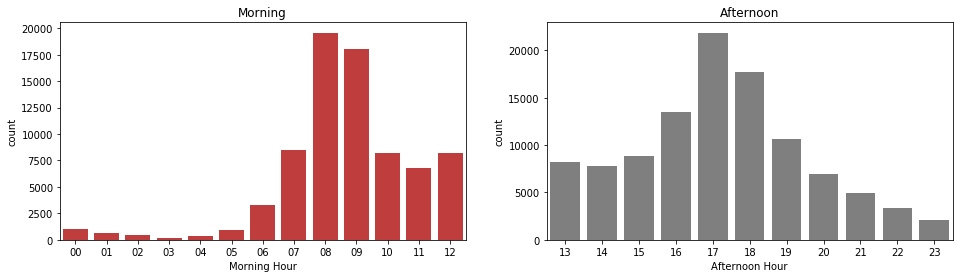

In [13]:
# Comparison between Morning:'AM' and Afternoon:'PM'

plt.figure(figsize=[16,4])

plt.subplot(1,2,1)
base_color = sb.color_palette()[3]
sb.countplot(AM, color = base_color)
plt.title('Morning')
plt.xlabel('Morning Hour')

plt.subplot(1,2,2)
base_color = sb.color_palette()[7]
sb.countplot(PM, color = base_color)
plt.title('Afternoon')
plt.xlabel('Afternoon Hour');

## Directions of Bike Users 

From the correlation plot, we can conclude that most users move toward **Northwest**.<br>
When the start_station_latitude increases 1 unit, the start_station_longitude will decrease 0.647 unit which means users move toward **Northwest**.<br> 
When the start_station_latitude increases 1 unit, the end_station_latitude will increase 0.988 unit which means users move slightly toward to **North**.<br> 
When the start_station_latitude increases 1 unit, the end_station_longitude will decrease 0.653 unit which means users move toward to **Northwest**.<br>
When the start_station_longitude increases 1 unit, the end_station_latitude will decrease 0.652 unit which means users move toward to **Southeast**.<br>
When the start_station_longitude increases 1 unit, the end_station_longitude will increase 0.991 unit which means users move slightly toward to **East**.<br>
When the end_station_latitude increases 1 unit, the end_station_longitude will decrease 0.654 unit which means users move slightly toward to **Northwest**.<br>


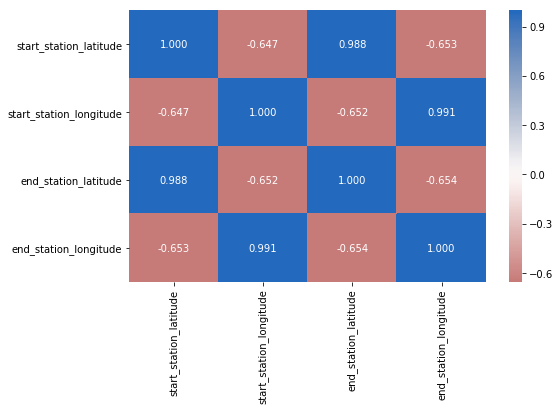

In [14]:
# correlation plot

numeric_vars=['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude']

plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

## Most Popular Bike Station by Start Station 

Most users start from Martet St and San Francisco Caltrain Station (#3663, #3635) which means they probably ride the Caltrain at first and then swith to the bikes.


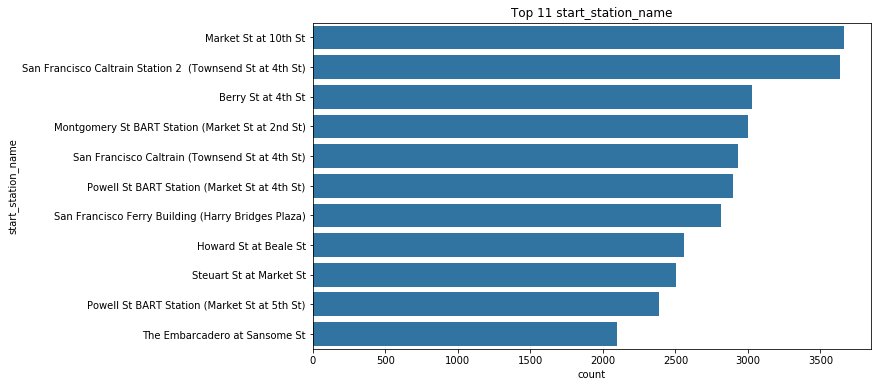

In [15]:
# Top 11 start_station_name

Threshold = 2000
make_frequency = df['start_station_name'].value_counts()
idx = np.sum(make_frequency > Threshold)

most_makes = make_frequency.index[:idx]
df_sub = df.loc[df['start_station_name'].isin(most_makes)]

plt.figure(figsize=[10,6])
plt.title('Top 11 start_station_name')
base_color = sb.color_palette()[0]
sb.countplot(data=df_sub, y='start_station_name', color = base_color, order = most_makes);

## Most Popular Bike Station by End Station 

Most users end the trip at San Francisco Caltrain Station (#4986) which means either the destinations are nearby or they need to ride Caltrain to other places.


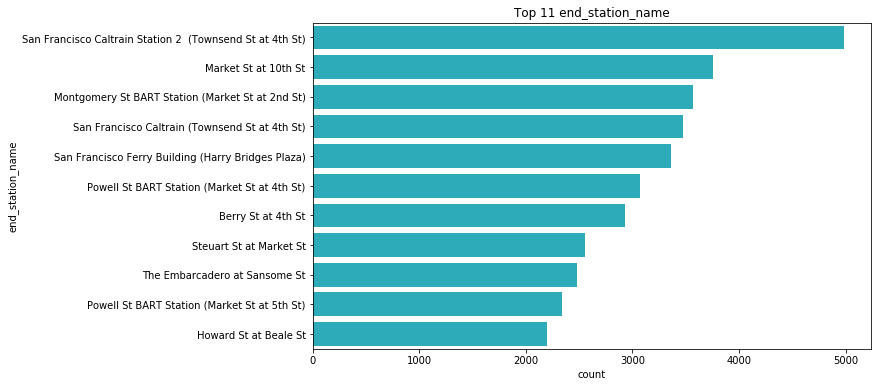

In [16]:
# Top 11 end_station_name

Threshold = 2000
make_frequency = df['end_station_name'].value_counts()
idx = np.sum(make_frequency > Threshold)

most_makes = make_frequency.index[:idx]
df_sub = df.loc[df['end_station_name'].isin(most_makes)]

plt.figure(figsize=[10,6])
base_color = sb.color_palette()[9]
plt.title('Top 11 end_station_name')
sb.countplot(data=df_sub, y='end_station_name', color = base_color, order = most_makes);